## <font color="red"> ESERCIZIO 02

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

### <font color="blue"> Parte 01

Nel primo caso ho semplicemente estratto $10^5$ numeri random distribuiti in maniera uniforme e li ho usati per valutare l'integranda: ho salvato ciascun risultato in un vettore e poi ho calcolato l'integrale utilizzando il *blocking method* (ho usato 100 blocks), eseguendo dunque una media come visto a lezione. Nella formula generale dovrei dividere ciascun valore dell'integranda per la lunghezza dell'intervallo di integrazione, ma dato che in questo caso vale 1 non è stato necessario.

Per quanto riguarda l'*importance sempling* ho voluto provare come distribuzione di probabilità una parabola centrata nell'origine in modo da avere una buona approssimazione della funzione coseno. Per campionare i numeri random secondo questa distribuzione ho calcolato la funzione cumulativa ma non sono stato in grado di invertirla dato che era una cubica. 

Ho deciso quindi di utilizzare una retta $d(x)$ a pendenza negativa che descrive un triangolo nel primo quadrante e l'ho normalizzata: così facendo descrive proprio una distribuzione di probabilità essendo positiva e con area sottesa pari a 1. La sua espressione vale

$$ d(x)=2(1-x): $$

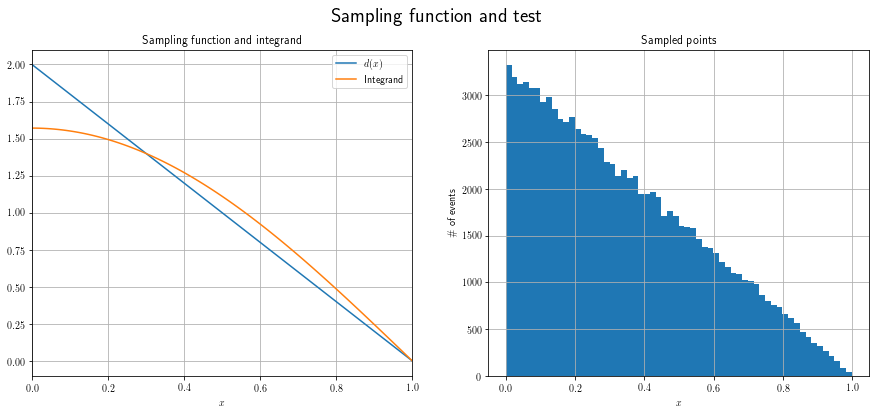

In [2]:
x = np.arange(0., 1.01, 0.01)
r = 2. * (1. - x)
c = np.pi/2. * np.cos(np.pi * x/2.)

plt.rc('text', usetex=True)

plt.figure(figsize=(15,6))
plt.suptitle('Sampling function and test', fontsize = 20)

plt.subplot(121)
plt.title('Sampling function and integrand')
plt.plot(x, r, label = '$d(x)$')
plt.plot(x, c, label = 'Integrand')

plt.xlim(0., 1)
plt.xlabel('$x$')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.title('Sampled points')
sa = np.loadtxt("Parte_01/Risultati/sampled.points", unpack='true')
plt.hist(sa, 60)

plt.xlabel('$x$')
plt.ylabel('$\#$ of events')
plt.grid(True)

plt.show()

Per campionare numeri random distribuiti secondo $d(x)$ ho calcolato la funzione cumulativa e l'ho invertita ottenendo

$$ f(y)=1-\sqrt{1-y} $$

dove $y$ è estratto uniformemente in $[0,1)$; il conteggio dei numeri campionati è presente nella figura precedente. La funzione è chiamata `cos` ed è salvata in `Random.cpp`; anche in questo caso ho fatto $10^5$ valutazioni dell'integrale e le ho divise in 100 blocks.

I risultati ottenuti sono i seguenti:

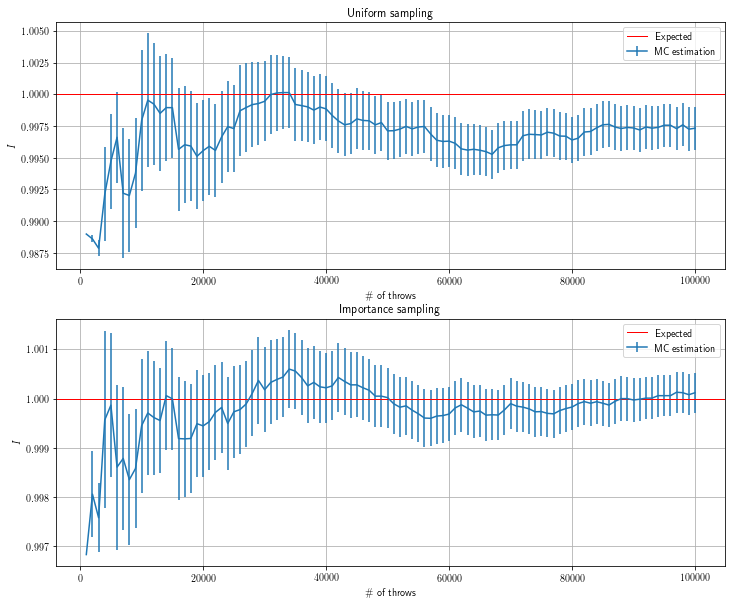

In [3]:
plt.figure(figsize=(12,10))

plt.subplot(211)
plt.title('Uniform sampling')
x, iu, erru = np.loadtxt("Parte_01/Risultati/int.uniform", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.axhline(y=1, color='red', linewidth=1, label='Expected')
plt.errorbar(x, iu, yerr=erru, label='MC estimation')

plt.xlabel('$\#$ of throws')
plt.ylabel('$I$')
plt.grid(True)
plt.legend()

plt.subplot(212)
plt.title('Importance sampling')
x, iss, errs = np.loadtxt("Parte_01/Risultati/int.imp", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.axhline(y=1, color='red', linewidth=1, label='Expected')
plt.errorbar(x, iss, yerr=errs, label='MC estimation')

plt.xlabel('$\#$ of throws')
plt.ylabel('$I$')
plt.grid(True)
plt.legend()

plt.show()

Dal confronto dei due grafici si vede come l'*importance sampling* sia più accurato a parità di esecuzioni, sia per quanto riguarda il valore esatto dell'integrale, sia per quanto riguarda l'errore, come si può vedere qui sotto, dove riporto il rapporto (in percentuale) tra l'errore e il valore corrispondente dell'integrale.

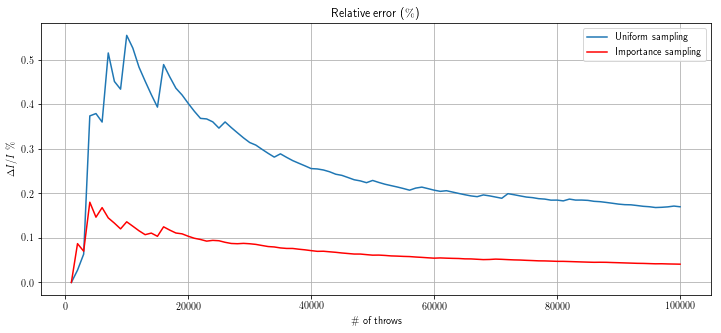

In [4]:
plt.figure(figsize=(12,5))

plt.title('Relative error ($\%$)')
plt.plot(x, erru/iu*100, label='Uniform sampling')
plt.plot(x, errs/iss*100, color='red', label='Importance sampling')

plt.xlabel('$\#$ of throws')
plt.ylabel('$\Delta I/I ~ \%$')
#plt.xlim(20000, 100000)
#plt.ylim(0, 0.0075)
plt.grid(True)
plt.legend()

plt.show()

### <font color="blue"> Parte 02
    
Per quanto riguarda il *discrete RW* ho implementato il seguente codice:
1. Fisso il numero di ripetizioni $N_{rep}$ e il numero di passi $N_{step}$.
2. Successivamente, partendo dall'origine, fisso il numero di passi $k$: estraggo ogni volta un numero random distribuito uniformemente per decidere lungo che asse muovermi e se andare avanti o indietro; ripeto finché non ho compiuto $k$ passi e calcolo la distanza al quadrato $\vert \overrightarrow{r} \vert^2$ del punto ottenuto dall'origine.
3. Ripeto il passaggio precedente $N_{rep}$ volte e calcolo valor medio e deviazione standard delle distanze ottenute; infine estraggo la radice quadrata in modo da ottenere la funzione richiesta nel testo $ \sqrt{\langle\vert \overrightarrow{r}\vert\rangle}$.

Nel caso invece di *continuum RW* il procedimento è lo stesso, solo che per effettuare il passo vengono estratti due numeri random distribuiti uniformemente che rappresentano i due angoli $(\theta,\phi)$ utilizzati per calcolare le posizioni in coordinate sferiche. Così facendo ogni nuova posizione è descritta dalle coordinate

$$ \left\lbrace\begin{aligned}
    x&=a\sin\theta\cos\phi \\
    y&=a\sin\theta\sin\phi \\
    z&=a\cos\phi
\end{aligned}\right. .$$

In entrambi i casi ho scelto $a=1$, $N_{step}=[1,100]$ e $N_{rep}=10^4$.

Fittando infine i dati con una funzione del tipo $f(N)=k\sqrt{N}$ ottengo i seguenti risultati:

In [5]:
# Fit function
def f(x,n):
    return n * np.sqrt(x)

-- DISCRETE RW --
Optimized k = [0.99963615]

-- CONTINUUM RW --
Optimized k = [1.00008457]



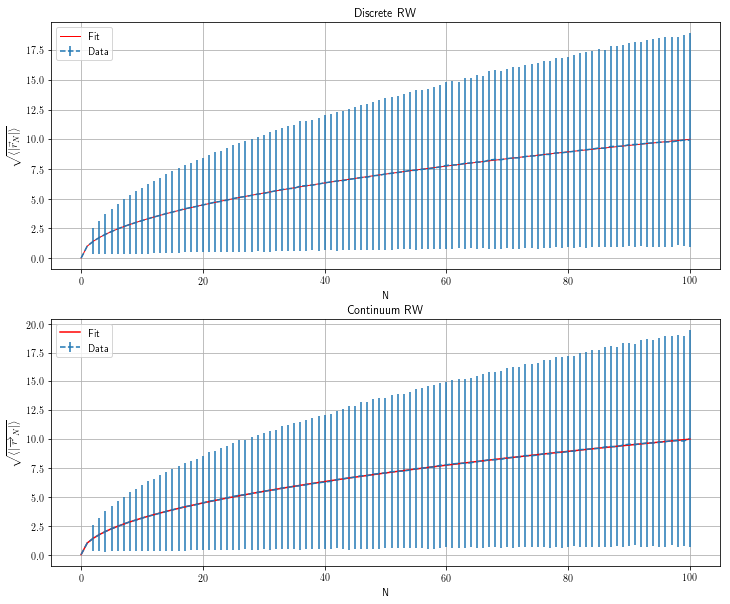

In [6]:
plt.figure(figsize=(12,10))

plt.subplot(211)
plt.title('Discrete RW')
n, r, err = np.loadtxt("Parte_02/Risultati/RW.discr", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(n, r, yerr=err, label='Data', linestyle='dashed')

# Fit
n_ott, n_err = curve_fit(f, n, r)
y_fit = f(n, n_ott)
plt.plot(n, y_fit, linewidth=1, color='red', label='Fit')

print("-- DISCRETE RW --")
print("Optimized k =", n_ott)
print()

plt.xlabel('N')
plt.ylabel(r'$\sqrt{\langle\vert \vec{r}_N\vert\rangle}$', fontsize=12)
plt.grid(True)
plt.legend(loc=2)

plt.subplot(212)
plt.title('Continuum RW')
n, r, err = np.loadtxt("Parte_02/Risultati/RW.cont", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(n, r, yerr=err, label='Data', linestyle='dashed')

# Fit
n_ott, n_err = curve_fit(f, n, r)
y_fit = f(n, n_ott)
plt.plot(n ,y_fit, color='red', label='Fit')

print("-- CONTINUUM RW --")
print("Optimized k =", n_ott)
print()

plt.xlabel('N')
plt.ylabel(r'$\sqrt{\langle\vert \overrightarrow{r}_N\vert\rangle}$', fontsize=12)
plt.grid(True)
plt.legend(loc=2)

plt.show()

Osservo che i dati sono ottimamente fittati da una funzione proporzionale a una radice quadrata: la costante di proporzionalità si vede che in entrambi i casi è pari a 1 cioè proprio $a$! Questo indica un comportamento diffusivo, tipico dei processi di *RW* e mostra come giustamente la deviazione standard sia $\sigma=a\sqrt{N}$.